In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# import jsons
def json2dict(path):
    x = pd.read_json(path)
    return dict(zip(x['id'], x['name']))
if False:
    pbooktitlefull = json2dict('data/pbooktitlefull.json')
    pjournal = json2dict('data/pjournal.json')
    pjournalfull = json2dict('data/pjournalfull.json')
    ptype = json2dict('data/ptype.json')

# import csvs
dblp = pd.DataFrame()
for i in range(1, 5):
    csv = pd.read_csv(f'../application/data/dblp-{i}.csv')
    dblp = pd.concat([dblp, csv]).reset_index(drop=True)

test_hidden = pd.read_csv('../application/data/test_hidden.csv')
train = pd.read_csv('../application/data/train.csv')
validation_hidden = pd.read_csv('../application/data/validation_hidden.csv')

In [ ]:
dblp

,Unnamed: 0,pauthor,peditor,ptitle,pyear,paddress,ppublisher,pseries,pid,pkey,ptype_id,pjournal_id,pbooktitle_id,pjournalfull_id,pbooktitlefull_id,partition
0,4,Jorge Semião|Juan J. Rodríguez-Andina|Fabian V...,NaN,Improving the Tolerance of Pipeline Based Circ...,-2007,NaN,NaN,NaN,180843,conf/dft/SemiaoRVSTT07,1,0,4,0,4,1
1,7,Patrice Caire,NaN,A Normative Multi-Agent Systems Approach to th...,-2007,NaN,NaN,NaN,162991,conf/dagstuhl/Caire07,2,0,7,0,7,1
2,10,Sundeep B|Andrew Thangaraj,NaN,Self-Orthogonality of q-Ary Images of qm-Ary C...,2007,NaN,NaN,NaN,2261406,journals/tit/BT07,0,2,9,2,9,1
3,18,Gerardo Pardo-Castellote,NaN,OMG Data-Distribution Service: Architectural O...,-2003,NaN,NaN,NaN,349720,conf/icdcsw/Pardo-Castellote03,1,0,11,0,11,1
4,19,Ki-Hoon Lee|Kyu-Young Whang|Wook-Shin Han|Min-...,NaN,Structural Consistency: Enabling XML Keyword S...,2009,NaN,NaN,NaN,1922328,journals/corr/abs-0911-4329,3,5,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17160,9975,Online bin packing with arbitrary release times.,NaN,Yongqiang Shi|Deshi Ye,2008,NaN,NaN,NaN,2245299,journals/tcs/ShiY08,0,12,5,12,5,4
17161,9978,Chew Lim Tan|Henry Wai Kit Chia,NaN,Neural Logic Network Learning using Genetic Pr...,2001,NaN,NaN,NaN,460233,conf/ijcai/TanC01,2,0,71,0,71,4
17162,9981,Sue Newell|Jacky Swan|Joseph Weiss,NaN,Project Management: Minitrack Introduction.,2004,NaN,NaN,NaN,289610,conf/hicss/NewellSW04,1,0,295,0,295,4
17163,9988,Martijn Hendriks|Barend van den Nieuwelaar|Fri...,NaN,Model checker aided design of a controller for...,-2006,NaN,NaN,NaN,2224414,journals/sttt/HendriksNV06,3,374,5,374,5,4


In [ ]:
same = train.loc[train['label']==True,'Unnamed: 0']
dblp.loc[dblp['Unnamed: 0']==8, 'pauthor'].values

array(['Kun Cao|Zhanguo Chen|Ce Ren|Gang Jia|Tiechen Zhang|Xiuhuan Liu|Bao Shi|Jianxun Zhao',
       'Shuguang Zhao|Licheng Jiao|Jianxun Zhao|Yuping Wang'],
      dtype=object)

In [ ]:
train[train['label']==True]

,Unnamed: 0,key1,key2,label,partition
1,1,conf/vlsid/ChenCC95,journals/tcad/LuoCWCCW08,True,4
2,2,conf/prozess/Sun88,conf/isnn/SunZLCS07,True,8
4,4,conf/dft/SemiaoRVSTT07,conf/iolts/Rodriguez-IragoAVSTT05,True,7
5,6,conf/lmo/DemphlousL96,conf/reflection/DemphlousL99,True,3
7,8,conf/eh/ZhaoJZW05,journals/mj/CaoCRJZLSZ09,True,8
...,...,...,...,...,...
7967,9993,journals/corr/abs-1011-1127,journals/corr/abs-1011-1119,True,4
7968,9994,journals/corr/abs-cs-0607015,journals/isci/Valle-LisboaM07,True,5
7969,9995,conf/splst/KalmanHG03,journals/infsof/KalmanHG06,True,7
7970,9997,conf/esws/DavidK0RZZ10,journals/corr/abs-1004-3390,True,3


In [ ]:
dblp[(dblp['pkey']=='conf/splst/KalmanHG03') |(dblp['pkey']=='journals/infsof/KalmanHG06')]

,Unnamed: 0,pauthor,peditor,ptitle,pyear,paddress,ppublisher,pseries,pid,pkey,ptype_id,pjournal_id,pbooktitle_id,pjournalfull_id,pbooktitlefull_id,partition
8578,19995,Miklós Kálmán|Ferenc Havasi|Tibor Gyimóthy,NaN,Compacting XML documents.,2006,NaN,NaN,NaN,2047104,journals/infsof/KalmanHG06,3,158,5,158,5,2
10799,9995,Miklós Kálmán|Ferenc Havasi|Tibor Gyimóthy,NaN,Compacting XML Documents.,2003,NaN,NaN,NaN,723354,conf/splst/KalmanHG03,1,0,2161,0,2161,3


In [ ]:
(dblp['pjournal_id']==0).sum()

11610

In [ ]:
(dblp.groupby('Unnamed: 0').count()>1)

,pauthor,peditor,ptitle,pyear,paddress,ppublisher,pseries,pid,pkey,ptype_id,pjournal_id,pbooktitle_id,pjournalfull_id,pbooktitlefull_id,partition
Unnamed: 0,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- Negative years
- Switched title and author
- Different languages of same paper
- journal_id == 0 for most papers
- 'Unamed: 0' seems to circle back to 1 after 9999 maybe it should be 10001

In [ ]:
dblp.loc[dblp['pyear']<0,'pyear'] =-dblp.loc[dblp['pyear']<0,'pyear']

(array([7.000e+00, 1.300e+01, 3.300e+01, 7.500e+01, 1.200e+02, 3.920e+02,
        8.210e+02, 2.129e+03, 4.681e+03, 8.894e+03]),
 array([1957. , 1962.4, 1967.8, 1973.2, 1978.6, 1984. , 1989.4, 1994.8,
        2000.2, 2005.6, 2011. ]),
 <BarContainer object of 10 artists>)

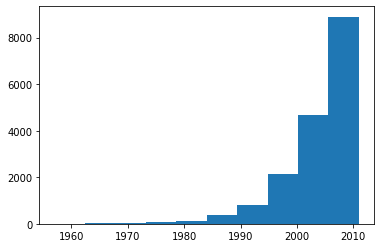

In [ ]:
plt.hist(dblp['pyear'])

In [ ]:
(dblp.groupby('pid').count()>1).sum()

Unnamed: 0           0
pauthor              0
peditor              0
ptitle               0
pyear                0
paddress             0
ppublisher           0
pseries              0
pkey                 0
ptype_id             0
pjournal_id          0
pbooktitle_id        0
pjournalfull_id      0
pbooktitlefull_id    0
partition            0
dtype: int64

Below are the proportions of 0s for each columns (0 means null for most of them)

In [ ]:
(dblp==0).sum()/len(dblp)

Unnamed: 0           0.000117
pauthor              0.000000
peditor              0.000000
ptitle               0.000000
pyear                0.000000
paddress             0.000000
ppublisher           0.000000
pseries              0.000000
pid                  0.000000
pkey                 0.000000
ptype_id             0.118089
pjournal_id          0.676376
pbooktitle_id        0.098223
pjournalfull_id      0.676376
pbooktitlefull_id    0.098223
partition            0.000000
dtype: float64

There is no apparent distribution shift between partitions

In [ ]:
dblp[dblp['pyear']<0].groupby('partition').count()

,Unnamed: 0,pauthor,peditor,ptitle,pyear,paddress,ppublisher,pseries,pid,pkey,ptype_id,pjournal_id,pbooktitle_id,pjournalfull_id,pbooktitlefull_id
partition,,,,,,,,,,,,,,,
1,1799,1799,0,1799,1799,0,5,1,1799,1799,1799,1799,1799,1799,1799
2,1754,1754,0,1754,1754,0,2,0,1754,1754,1754,1754,1754,1754,1754
3,1767,1767,0,1767,1767,0,0,0,1767,1767,1767,1767,1767,1767,1767
4,1725,1725,0,1725,1725,0,4,1,1725,1725,1725,1725,1725,1725,1725


In [5]:
train[train['label']==False].groupby('partition').count()

NameError: name 'train' is not defined

In [12]:
train_data = train[train['partition']!=8]
val_data = train[train['partition']==8]

In [196]:
text_features = dblp[['pkey','pauthor', 'ptitle', 'pyear']]

mask = text_features['ptitle'].str.contains('|') |(text_features['ptitle'].str.len() <40)
text_features.loc[mask,['pauthor','ptitle']] = text_features.loc[mask,['pauthor','ptitle']].values
full_train = pd.merge(train, text_features, left_on='key1', right_on='pkey', suffixes=('', '_x'))
full_train = pd.merge(full_train, text_features, left_on='key2', right_on='pkey', suffixes=('_x', '_y'))


In [201]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.replace('|',' ').split()) 
    b = set(str2.replace('|',' ').split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))



In [202]:
full_train['similarity'] = full_train.apply(lambda x: get_jaccard_sim(x['pauthor_x'], x['pauthor_y']), axis=1)
full_train['similarity_title'] = full_train.apply(lambda x: get_jaccard_sim(x['ptitle_x'], x['ptitle_y']), axis=1)

In [215]:
prediction = full_train['similarity'] + full_train['similarity_title'] > 0.2

In [216]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, full_train['label'])

0.7348218765679879

In [184]:
full_train[full_train['label']==True].tail(20)

,Unnamed: 0,key1,key2,label,partition,pkey_x,pauthor_x,ptitle_x,pyear_x,pkey_y,pauthor_y,ptitle_y,pyear_y,similarity,similarity_title
7952,9974,journals/nar/KogelnikLBNW96,journals/nar/KogelnikLBNW98,True,7,journals/nar/KogelnikLBNW96,Andreas M. Kogelnik|Marie T. Lott|Michael D. B...,MITOMAP: a human mitochondrial genome database.,-1996,journals/nar/KogelnikLBNW98,Andreas M. Kogelnik|Marie T. Lott|Michael D. B...,MITOMAP: a human mitochondrial genome database...,-1998,1.000000,0.625000
7953,9975,conf/escape/ShiY07,journals/tcs/ShiY08,True,3,conf/escape/ShiY07,On-Line Bin Packing with Arbitrary Release Times.,Yongqiang Shi|Deshi Ye,2007,journals/tcs/ShiY08,Online bin packing with arbitrary release times.,Yongqiang Shi|Deshi Ye,2008,0.076923,1.000000
7954,9976,journals/soco/ChovanecNS10,journals/soco/ChovanecD03,True,2,journals/soco/ChovanecNS10,Ferdinand Chovanec|Olga Nánásiová|Alexander P....,Preface of the guest editors.,-2010,journals/soco/ChovanecD03,Ferdinand Chovanec|Anatolij Dvurecenskij,Preface of the Guest Editors.,-2003,0.142857,0.428571
7955,9977,conf/podc/FernandezR07,conf/opodis/AntaR07,True,4,conf/podc/FernandezR07,Antonio Fernández|Michel Raynal,From an intermittent rotating star to a leader.,2007,conf/opodis/AntaR07,Antonio Fernández Anta|Michel Raynal,From an Intermittent Rotating Star to a Leader.,2007,0.400000,0.333333
7956,9978,journals/ijcia/ChiaT01,conf/ijcai/TanC01,True,3,journals/ijcia/ChiaT01,Henry Wai Kit Chia|Chew Lim Tan,Neural Logic Network Learning Using Genetic Pr...,2001,conf/ijcai/TanC01,Chew Lim Tan|Henry Wai Kit Chia,Neural Logic Network Learning using Genetic Pr...,2001,0.333333,0.750000
7957,9979,journals/monet/MerinoMSSK05,conf/wmash/MatsunagaMSK03,True,7,journals/monet/MerinoMSSK05,Ana Sanz Merino|Yasuhiko Matsunaga|Manish Shah...,Secure Authentication System for Public WLAN R...,-2005,conf/wmash/MatsunagaMSK03,Yasuhiko Matsunaga|Ana Sanz Merino|Takashi Suz...,Secure authentication system for public WLAN r...,-2003,0.363636,0.272727
7958,9982,journals/corr/cmp-lg-9706020,journals/jair/WiebeOOM98,True,6,journals/corr/cmp-lg-9706020,An Empirical Approach to Temporal Reference Re...,Janyce Wiebe|Thomas P. O'Hara|Kenneth J. McKee...,1997,journals/jair/WiebeOOM98,An Empirical Approach to Temporal Reference Re...,Janyce Wiebe|Thomas P. O'Hara|Thorsten Öhrströ...,1998,0.750000,0.400000
7959,9983,conf/icra/ChakrabortyPAM06,journals/trob/ChakrabortyPAM08,True,3,conf/icra/ChakrabortyPAM06,Nilanjan Chakraborty|Jufeng Peng|Srinivas Akel...,Proximity Queries between Convex Objects: an I...,-2006,journals/trob/ChakrabortyPAM08,Nilanjan Chakraborty|Jufeng Peng|Srinivas Akel...,Proximity Queries Between Convex Objects: An I...,-2008,0.571429,0.714286
7960,9984,conf/cdc/ZymnisBG08,conf/icarcv/ZymnisBG08,True,6,conf/cdc/ZymnisBG08,Argyrios Zymnis|Stephen P. Boyd|Dimitry M. Gor...,Mixed state estimation for a linear Gaussian M...,2008,conf/icarcv/ZymnisBG08,Argyris Zymnis|Stephen P. Boyd|Dimitry M. Gori...,Mixed state estimation for a linear Gaussian M...,2008,0.714286,1.000000
7961,9986,journals/tip/MatungkaZE09,conf/icip/MatungkaZE08,True,7,journals/tip/MatungkaZE09,Rittavee Matungka|Yuan F. Zheng|Robert L. Ewing,Image Registration Using Adaptive Polar Transf...,-2009,conf/icip/MatungkaZE08,Rittavee Matungka|Yuan F. Zheng|Robert L. Ewing,Image registration using Adaptive Polar Transf...,-2008,1.000000,0.500000
